# Machine Learning

In this file, instructions how to approach the challenge can be found.

We are going to work on different types of Machine Learning problems:

- **Regression Problem**: The goal is to predict delay of flights.
- **(Stretch) Multiclass Classification**: If the plane was delayed, we will predict what type of delay it is (will be).
- **(Stretch) Binary Classification**: The goal is to predict if the flight will be cancelled.

In [1]:
import pandas as pd
df = pd.read_csv("sample3")
df.columns, df.shape

(Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
        'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
        'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
        'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
        'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
        'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled',
        'cancellation_code', 'diverted', 'dup', 'crs_elapsed_time',
        'actual_elapsed_time', 'air_time', 'flights', 'distance',
        'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
        'late_aircraft_delay', 'first_dep_time', 'total_add_gtime',
        'longest_add_gtime', 'no_name'],
       dtype='object'),
 (100000, 42))

## Main Task: Regression Problem

The target variable is **ARR_DELAY**. We need to be careful which columns to use and which don't. For example, DEP_DELAY is going to be the perfect predictor, but we can't use it because in real-life scenario, we want to predict the delay before the flight takes of --> We can use average delay from earlier days but not the one from the actual flight we predict.  

For example, variables **CARRIER_DELAY, WEATHER_DELAY, NAS_DELAY, SECURITY_DELAY, LATE_AIRCRAFT_DELAY** shouldn't be used directly as predictors as well. However, we can create various transformations from earlier values.

We will be evaluating your models by predicting the ARR_DELAY for all flights **1 week in advance**.

In [2]:
import copy
data = copy.deepcopy(df)

In [3]:
data.isnull().sum().sort_values(ascending=False)

no_name                100000
first_dep_time          99329
longest_add_gtime       99329
total_add_gtime         99329
cancellation_code       98313
late_aircraft_delay     80999
carrier_delay           80999
security_delay          80999
nas_delay               80999
weather_delay           80999
air_time                 2009
arr_delay                1975
actual_elapsed_time      1960
wheels_on                1777
taxi_in                  1777
arr_time                 1728
taxi_out                 1717
wheels_off               1717
dep_delay                1648
dep_time                 1612
tail_num                  299
crs_elapsed_time            1
distance                    0
flights                     0
diverted                    0
dup                         0
fl_date                     0
cancelled                   0
mkt_unique_carrier          0
crs_dep_time                0
dest_city_name              0
dest                        0
dest_airport_id             0
origin_cit

In [4]:
# cols with > 80% missing values
drop = [
    'no_name',
    'total_add_gtime',
    'first_dep_time',
    'longest_add_gtime',
    'cancellation_code',
]

# missing 80%+ values, but could be of use later
delay = [
    'late_aircraft_delay',
    'security_delay',
    'nas_delay',
    'weather_delay',
    'carrier_delay'
]

In [5]:
data = data.drop(columns=drop+delay)

In [6]:
data

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,arr_time,arr_delay,cancelled,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance
0,2019-12-29,AA,AA_CODESHARE,AA,2971,OO,N719SK,2971,14489,RDM,...,922.0,54.0,0.0,0.0,N,148.0,176.0,105.0,1.0,726.0
1,2018-03-30,NK,NK,NK,567,NK,N669NK,567,11433,DTW,...,2313.0,-2.0,0.0,0.0,N,124.0,118.0,99.0,1.0,594.0
2,2019-02-24,WN,WN,WN,3691,WN,N8510E,3691,11292,DEN,...,2145.0,-10.0,0.0,0.0,N,195.0,183.0,167.0,1.0,1506.0
3,2019-07-16,AS,AS,AS,544,AS,N277AK,544,10299,ANC,...,604.0,-1.0,0.0,0.0,N,210.0,199.0,173.0,1.0,1448.0
4,2019-03-23,AA,AA_CODESHARE,AA,3354,MQ,N854AE,3354,13931,ORF,...,1248.0,20.0,0.0,0.0,N,96.0,89.0,60.0,1.0,296.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2018-11-05,UA,UA,UA,314,UA,N779UA,314,12892,LAX,...,1636.0,-12.0,0.0,0.0,N,133.0,126.0,111.0,1.0,862.0
99996,2018-01-18,DL,DL,DL,2849,DL,N919AT,2849,14869,SLC,...,1703.0,-21.0,0.0,0.0,N,94.0,78.0,57.0,1.0,368.0
99997,2018-10-31,DL,DL_CODESHARE,DL,5251,9E,N8936A,5251,11778,FSM,...,1757.0,-8.0,0.0,0.0,N,95.0,98.0,78.0,1.0,579.0
99998,2018-08-29,DL,DL_CODESHARE,DL,4605,OO,N498CA,4605,10185,AEX,...,836.0,-15.0,0.0,0.0,N,111.0,100.0,79.0,1.0,500.0


### Feature Engineering

Feature engineering will play a crucial role in this problems. We have only very little attributes so we need to create some features that will have some predictive power.

- weather: we can use some weather API to look for the weather in time of the scheduled departure and scheduled arrival.
- statistics (avg, mean, median, std, min, max...): we can take a look at previous delays and compute descriptive statistics
- airports encoding: we need to think about what to do with the airports and other categorical variables
- time of the day: the delay probably depends on the airport traffic which varies during the day.
- airport traffic
- unsupervised learning as feature engineering?
- **what are the additional options?**: Think about what we could do more to improve the model.

In [7]:
#average delay time by air carrier I LIKE IT
data[['mkt_unique_carrier','arr_delay']].groupby(['mkt_unique_carrier'])['arr_delay'].mean().sort_values(ascending=False).head(11)

mkt_unique_carrier
F9    12.547912
B6    11.109981
G4     9.670382
UA     9.058796
AA     6.891671
NK     4.832506
VX     4.034783
WN     3.896911
HA     2.718777
DL     2.489861
AS     0.468218
Name: arr_delay, dtype: float64

In [8]:
#creating a new column that takes the average arrival delay per air carrier
data['avg_delay_carrier'] = data['mkt_unique_carrier'].replace({
    'F9':12.547912,
    'B6':11.109981,
    'G4':9.670382,
    'UA':9.058796,
    'AA':6.891671,
    'NK':4.832506,
    'VX':4.034783,
    'WN':3.896911,
    'HA':2.718777,
    'DL':2.489861,
    'AS':0.468218
})

In [9]:
data['avg_delay_carrier']

0        6.891671
1        4.832506
2        3.896911
3        0.468218
4        6.891671
           ...   
99995    9.058796
99996    2.489861
99997    2.489861
99998    2.489861
99999    3.896911
Name: avg_delay_carrier, Length: 100000, dtype: float64

In [10]:
#we can drop flights since it has no useful information. Obviously each flight is worth 1
data['flights'].value_counts()

1.0    100000
Name: flights, dtype: int64

In [11]:
data = data.drop(columns=['flights'])

In [12]:
data

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,arr_time,arr_delay,cancelled,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,distance,avg_delay_carrier
0,2019-12-29,AA,AA_CODESHARE,AA,2971,OO,N719SK,2971,14489,RDM,...,922.0,54.0,0.0,0.0,N,148.0,176.0,105.0,726.0,6.891671
1,2018-03-30,NK,NK,NK,567,NK,N669NK,567,11433,DTW,...,2313.0,-2.0,0.0,0.0,N,124.0,118.0,99.0,594.0,4.832506
2,2019-02-24,WN,WN,WN,3691,WN,N8510E,3691,11292,DEN,...,2145.0,-10.0,0.0,0.0,N,195.0,183.0,167.0,1506.0,3.896911
3,2019-07-16,AS,AS,AS,544,AS,N277AK,544,10299,ANC,...,604.0,-1.0,0.0,0.0,N,210.0,199.0,173.0,1448.0,0.468218
4,2019-03-23,AA,AA_CODESHARE,AA,3354,MQ,N854AE,3354,13931,ORF,...,1248.0,20.0,0.0,0.0,N,96.0,89.0,60.0,296.0,6.891671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2018-11-05,UA,UA,UA,314,UA,N779UA,314,12892,LAX,...,1636.0,-12.0,0.0,0.0,N,133.0,126.0,111.0,862.0,9.058796
99996,2018-01-18,DL,DL,DL,2849,DL,N919AT,2849,14869,SLC,...,1703.0,-21.0,0.0,0.0,N,94.0,78.0,57.0,368.0,2.489861
99997,2018-10-31,DL,DL_CODESHARE,DL,5251,9E,N8936A,5251,11778,FSM,...,1757.0,-8.0,0.0,0.0,N,95.0,98.0,78.0,579.0,2.489861
99998,2018-08-29,DL,DL_CODESHARE,DL,4605,OO,N498CA,4605,10185,AEX,...,836.0,-15.0,0.0,0.0,N,111.0,100.0,79.0,500.0,2.489861


In [13]:
#looking at avg delay per airport
origindelays = data[['origin','arr_delay']].groupby(['origin'])['arr_delay'].mean().sort_values()
origindelays

origin
GST    -26.000000
PIR    -21.000000
ROP    -20.000000
INL    -19.285714
GCC    -18.142857
          ...    
USA     93.058824
XWA    108.600000
PQI    113.400000
LBL    128.666667
CYS    137.666667
Name: arr_delay, Length: 368, dtype: float64

In [14]:
data['origindelays']=data['origin']

In [15]:
data['origindelays'] = data['origindelays'].replace(origindelays)

In [16]:
data['origindelays']

0        11.613445
1         2.926685
2         8.697905
3        -4.577947
4         7.924581
           ...    
99995     1.860914
99996     2.077253
99997    34.129032
99998    10.916667
99999     7.568140
Name: origindelays, Length: 100000, dtype: float64

In [17]:
#dropping origin + many others that we've already looked at
data = data.drop(columns=['origin', 'origin_airport_id', 'mkt_unique_carrier','branded_code_share','mkt_carrier', 'op_unique_carrier', 'mkt_carrier_fl_num'])

In [18]:
#tail number related delays
taildelays = data[['tail_num','arr_delay']].groupby(['tail_num'])['arr_delay'].mean().sort_values()

In [19]:
data['taildelays'] = data['tail_num']
data['taildelays'] = data['taildelays'].replace(taildelays)
data['taildelays']

0        -0.636364
1         1.100000
2        -1.300000
3        -1.444444
4         8.652174
           ...    
99995    -2.600000
99996   -13.458333
99997    -1.200000
99998    -7.916667
99999          NaN
Name: taildelays, Length: 100000, dtype: float64

In [20]:
data

,fl_date,tail_num,op_carrier_fl_num,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,...,cancelled,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,distance,avg_delay_carrier,origindelays,taildelays
0,2019-12-29,N719SK,2971,"Bend/Redmond, OR",12892,LAX,"Los Angeles, CA",600,626.0,26.0,...,0.0,0.0,N,148.0,176.0,105.0,726.0,6.891671,11.613445,-0.636364
1,2018-03-30,N669NK,567,"Detroit, MI",10397,ATL,"Atlanta, GA",2111,2115.0,4.0,...,0.0,0.0,N,124.0,118.0,99.0,594.0,4.832506,2.926685,1.100000
2,2019-02-24,N8510E,3691,"Denver, CO",15304,TPA,"Tampa, FL",1640,1642.0,2.0,...,0.0,0.0,N,195.0,183.0,167.0,1506.0,3.896911,8.697905,-1.300000
3,2019-07-16,N277AK,544,"Anchorage, AK",14747,SEA,"Seattle, WA",135,145.0,10.0,...,0.0,0.0,N,210.0,199.0,173.0,1448.0,0.468218,-4.577947,-1.444444
4,2019-03-23,N854AE,3354,"Norfolk, VA",12953,LGA,"New York, NY",1052,1119.0,27.0,...,0.0,0.0,N,96.0,89.0,60.0,296.0,6.891671,7.924581,8.652174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2018-11-05,N779UA,314,"Los Angeles, CA",11292,DEN,"Denver, CO",1335,1330.0,-5.0,...,0.0,0.0,N,133.0,126.0,111.0,862.0,9.058796,1.860914,-2.600000
99996,2018-01-18,N919AT,2849,"Salt Lake City, UT",12889,LAS,"Las Vegas, NV",1650,1645.0,-5.0,...,0.0,0.0,N,94.0,78.0,57.0,368.0,2.489861,2.077253,-13.458333
99997,2018-10-31,N8936A,5251,"Fort Smith, AR",10397,ATL,"Atlanta, GA",1530,1519.0,-11.0,...,0.0,0.0,N,95.0,98.0,78.0,579.0,2.489861,34.129032,-1.200000
99998,2018-08-29,N498CA,4605,"Alexandria, LA",10397,ATL,"Atlanta, GA",600,556.0,-4.0,...,0.0,0.0,N,111.0,100.0,79.0,500.0,2.489861,10.916667,-7.916667


In [21]:
data = data.drop(columns=['tail_num', 'op_carrier_fl_num', 'dest_airport_id', 'dup'])

In [22]:
data

,fl_date,origin_city_name,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,...,arr_delay,cancelled,diverted,crs_elapsed_time,actual_elapsed_time,air_time,distance,avg_delay_carrier,origindelays,taildelays
0,2019-12-29,"Bend/Redmond, OR",LAX,"Los Angeles, CA",600,626.0,26.0,27.0,653.0,838.0,...,54.0,0.0,0.0,148.0,176.0,105.0,726.0,6.891671,11.613445,-0.636364
1,2018-03-30,"Detroit, MI",ATL,"Atlanta, GA",2111,2115.0,4.0,10.0,2125.0,2304.0,...,-2.0,0.0,0.0,124.0,118.0,99.0,594.0,4.832506,2.926685,1.100000
2,2019-02-24,"Denver, CO",TPA,"Tampa, FL",1640,1642.0,2.0,11.0,1653.0,2140.0,...,-10.0,0.0,0.0,195.0,183.0,167.0,1506.0,3.896911,8.697905,-1.300000
3,2019-07-16,"Anchorage, AK",SEA,"Seattle, WA",135,145.0,10.0,7.0,152.0,545.0,...,-1.0,0.0,0.0,210.0,199.0,173.0,1448.0,0.468218,-4.577947,-1.444444
4,2019-03-23,"Norfolk, VA",LGA,"New York, NY",1052,1119.0,27.0,25.0,1144.0,1244.0,...,20.0,0.0,0.0,96.0,89.0,60.0,296.0,6.891671,7.924581,8.652174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2018-11-05,"Los Angeles, CA",DEN,"Denver, CO",1335,1330.0,-5.0,11.0,1341.0,1632.0,...,-12.0,0.0,0.0,133.0,126.0,111.0,862.0,9.058796,1.860914,-2.600000
99996,2018-01-18,"Salt Lake City, UT",LAS,"Las Vegas, NV",1650,1645.0,-5.0,11.0,1656.0,1653.0,...,-21.0,0.0,0.0,94.0,78.0,57.0,368.0,2.489861,2.077253,-13.458333
99997,2018-10-31,"Fort Smith, AR",ATL,"Atlanta, GA",1530,1519.0,-11.0,9.0,1528.0,1746.0,...,-8.0,0.0,0.0,95.0,98.0,78.0,579.0,2.489861,34.129032,-1.200000
99998,2018-08-29,"Alexandria, LA",ATL,"Atlanta, GA",600,556.0,-4.0,13.0,609.0,828.0,...,-15.0,0.0,0.0,111.0,100.0,79.0,500.0,2.489861,10.916667,-7.916667


In [23]:
#arr delay for destinations
destdelays = data[['dest','arr_delay']].groupby(['dest'])['arr_delay'].mean().sort_values()
destdelays

dest
ATY    -24.800000
PIR    -18.500000
ABR    -17.833333
SLN    -16.166667
SHD    -14.750000
          ...    
HGR     85.000000
BKG     92.000000
PQI    129.666667
PUB    144.400000
HYA    199.000000
Name: arr_delay, Length: 369, dtype: float64

In [24]:
data['destdelays'] = data['dest']
data['destdelays'] = data['destdelays'].replace(destdelays)
data['destdelays']

0         2.957704
1         2.985783
2         2.579281
3         3.655560
4        10.855550
           ...    
99995     4.462143
99996     4.809410
99997     2.985783
99998     2.985783
99999     4.809410
Name: destdelays, Length: 100000, dtype: float64

In [25]:
data = data.drop(columns=['dest', 'crs_dep_time', 'wheels_off', 'wheels_on'])

In [26]:
data

,fl_date,origin_city_name,dest_city_name,dep_time,dep_delay,taxi_out,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,diverted,crs_elapsed_time,actual_elapsed_time,air_time,distance,avg_delay_carrier,origindelays,taildelays,destdelays
0,2019-12-29,"Bend/Redmond, OR","Los Angeles, CA",626.0,26.0,27.0,44.0,828,922.0,54.0,0.0,0.0,148.0,176.0,105.0,726.0,6.891671,11.613445,-0.636364,2.957704
1,2018-03-30,"Detroit, MI","Atlanta, GA",2115.0,4.0,10.0,9.0,2315,2313.0,-2.0,0.0,0.0,124.0,118.0,99.0,594.0,4.832506,2.926685,1.100000,2.985783
2,2019-02-24,"Denver, CO","Tampa, FL",1642.0,2.0,11.0,5.0,2155,2145.0,-10.0,0.0,0.0,195.0,183.0,167.0,1506.0,3.896911,8.697905,-1.300000,2.579281
3,2019-07-16,"Anchorage, AK","Seattle, WA",145.0,10.0,7.0,19.0,605,604.0,-1.0,0.0,0.0,210.0,199.0,173.0,1448.0,0.468218,-4.577947,-1.444444,3.655560
4,2019-03-23,"Norfolk, VA","New York, NY",1119.0,27.0,25.0,4.0,1228,1248.0,20.0,0.0,0.0,96.0,89.0,60.0,296.0,6.891671,7.924581,8.652174,10.855550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2018-11-05,"Los Angeles, CA","Denver, CO",1330.0,-5.0,11.0,4.0,1648,1636.0,-12.0,0.0,0.0,133.0,126.0,111.0,862.0,9.058796,1.860914,-2.600000,4.462143
99996,2018-01-18,"Salt Lake City, UT","Las Vegas, NV",1645.0,-5.0,11.0,10.0,1724,1703.0,-21.0,0.0,0.0,94.0,78.0,57.0,368.0,2.489861,2.077253,-13.458333,4.809410
99997,2018-10-31,"Fort Smith, AR","Atlanta, GA",1519.0,-11.0,9.0,11.0,1805,1757.0,-8.0,0.0,0.0,95.0,98.0,78.0,579.0,2.489861,34.129032,-1.200000,2.985783
99998,2018-08-29,"Alexandria, LA","Atlanta, GA",556.0,-4.0,13.0,8.0,851,836.0,-15.0,0.0,0.0,111.0,100.0,79.0,500.0,2.489861,10.916667,-7.916667,2.985783


In [27]:
#dropping cancelled flights
data.drop(data[(data['cancelled'] ==1)].index, inplace=True)

In [28]:
#drop diverted flights
data.drop(data[(data['diverted'] ==1)].index, inplace=True)

In [29]:
data = data.drop(columns=['crs_arr_time','cancelled','diverted','crs_elapsed_time'])

In [34]:
data

,fl_date,origin_city_name,dest_city_name,dep_time,dep_delay,taxi_out,taxi_in,arr_time,arr_delay,actual_elapsed_time,air_time,distance,avg_delay_carrier,origindelays,taildelays,destdelays
0,2019-12-29,"Bend/Redmond, OR","Los Angeles, CA",626.0,26.0,27.0,44.0,922.0,54.0,176.0,105.0,726.0,6.891671,11.613445,-0.636364,2.957704
1,2018-03-30,"Detroit, MI","Atlanta, GA",2115.0,4.0,10.0,9.0,2313.0,-2.0,118.0,99.0,594.0,4.832506,2.926685,1.100000,2.985783
2,2019-02-24,"Denver, CO","Tampa, FL",1642.0,2.0,11.0,5.0,2145.0,-10.0,183.0,167.0,1506.0,3.896911,8.697905,-1.300000,2.579281
3,2019-07-16,"Anchorage, AK","Seattle, WA",145.0,10.0,7.0,19.0,604.0,-1.0,199.0,173.0,1448.0,0.468218,-4.577947,-1.444444,3.655560
4,2019-03-23,"Norfolk, VA","New York, NY",1119.0,27.0,25.0,4.0,1248.0,20.0,89.0,60.0,296.0,6.891671,7.924581,8.652174,10.855550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,2018-09-04,"Raleigh/Durham, NC","Fort Lauderdale, FL",656.0,-4.0,15.0,5.0,854.0,-9.0,118.0,98.0,680.0,11.109981,10.962712,9.315789,9.222041
99995,2018-11-05,"Los Angeles, CA","Denver, CO",1330.0,-5.0,11.0,4.0,1636.0,-12.0,126.0,111.0,862.0,9.058796,1.860914,-2.600000,4.462143
99996,2018-01-18,"Salt Lake City, UT","Las Vegas, NV",1645.0,-5.0,11.0,10.0,1703.0,-21.0,78.0,57.0,368.0,2.489861,2.077253,-13.458333,4.809410
99997,2018-10-31,"Fort Smith, AR","Atlanta, GA",1519.0,-11.0,9.0,11.0,1757.0,-8.0,98.0,78.0,579.0,2.489861,34.129032,-1.200000,2.985783


In [30]:
#Does time of day effect arr_delay?
data[['dep_time','arr_delay']].groupby(['dep_time'])['arr_delay'].mean().sort_values()

dep_time
331.0     -36.0
139.0     -31.0
446.0     -31.0
159.0     -27.0
435.0     -25.0
          ...  
248.0     466.0
152.0     481.5
428.0     541.0
254.0     542.0
313.0    1190.0
Name: arr_delay, Length: 1333, dtype: float64

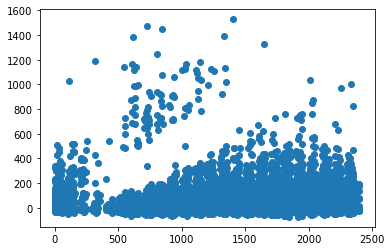

In [31]:
import matplotlib.pyplot as plt
plt.scatter(data['dep_time'],data['arr_delay'])

### Feature Selection / Dimensionality Reduction

We need to apply different selection techniques to find out which one will be the best for our problems.

- Original Features vs. PCA conponents?

In [32]:
#original features transformed

In [33]:
data.to_csv('data', index=False)

### Modeling

Use different ML techniques to predict each problem.

- linear / logistic / multinomial logistic regression
- Naive Bayes
- Random Forest
- SVM
- XGBoost
- The ensemble of your own choice

### Evaluation

You have data from 2018 and 2019 to develop models. Use different evaluation metrics for each problem and compare the performance of different models.

You are required to predict delays on **out of sample** data from **first 7 days (1st-7th) of January 2020** and to share the file with LighthouseLabs. Sample submission can be found in the file **_sample_submission.csv_**

======================================================================
## Stretch Tasks

### Multiclass Classification

The target variables are **CARRIER_DELAY, WEATHER_DELAY, NAS_DELAY, SECURITY_DELAY, LATE_AIRCRAFT_DELAY**. We need to do additional transformations because these variables are not binary but continuos. For each flight that was delayed, we need to have one of these variables as 1 and others 0.

It can happen that we have two types of delays with more than 0 minutes. In this case, take the bigger one as 1 and others as 0.

### Binary Classification

The target variable is **CANCELLED**. The main problem here is going to be huge class imbalance. We have only very little cancelled flights with comparison to all flights. It is important to do the right sampling before training and to choose correct evaluation metrics.